<a href="https://colab.research.google.com/github/shaun420-20/SPARK_FOUNDATION_TASK1-/blob/main/ipl_dataset_spark_foundation_task_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline

In [4]:
df = pd.read_csv('deliveries.csv')
df.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


# New Section

#  CHECKING NO OF RUNS SCORED WHEN MATCH_ID =1 AND OVER =1 

In [5]:
overs = df [(df['match_id']==1)]['over']
runs = df [(df['match_id']==1)& (df['over']==1)]['total_runs'].sum()
runs

18

## maximum scored by the batsman in all the years 

In [7]:
df.groupby('batsman').sum()['batsman_runs'].sort_values(ascending = False).head(20)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
BB McCullum       2893
PA Patel          2874
MK Pandey         2872
KA Pollard        2784
Yuvraj Singh      2765
Name: batsman_runs, dtype: int64

### maximum balls balled by the balling team 

In [8]:
df.groupby('bowling_team').sum()['ball'].sort_values(ascending = False)

bowling_team
Mumbai Indians                 81698
Royal Challengers Bangalore    77058
Kolkata Knight Riders          75522
Kings XI Punjab                75284
Chennai Super Kings            70567
Delhi Daredevils               67677
Rajasthan Royals               63020
Sunrisers Hyderabad            45842
Deccan Chargers                32738
Pune Warriors                  19587
Gujarat Lions                  12711
Delhi Capitals                  7097
Rising Pune Supergiant          6973
Rising Pune Supergiants         5851
Kochi Tuskers Kerala            5847
Name: ball, dtype: int64

### best strike rate is of player from hydrabad

In [9]:
batsman = df.groupby('batsman')['batsman_runs'].agg(['min','max','mean','count','sum'])
batsman['Strike_rate']= batsman['sum']/ batsman['count']*100
batsman['Strike_rate'].sort_values(ascending= False).head(30)

batsman
B Stanlake         250.000000
Umar Gul           205.263158
RS Sodhi           200.000000
S Sharma           200.000000
AD Russell         179.950187
Shahid Afridi      176.086957
I Malhotra         175.000000
S Curran           172.727273
K Gowtham          172.093023
SN Thakur          171.428571
M Ali              169.945355
LJ Wright          168.253968
SP Narine          166.943867
Shivam Sharma      166.666667
KMDN Kulasekara    166.666667
KK Cooper          165.714286
BCJ Cutting        164.383562
Kamran Akmal       164.102564
BJ Haddin          163.636364
Rashid Khan        162.686567
KJ Abbott          162.500000
RR Pant            162.318841
N Pooran           160.909091
ER Dwivedi         160.000000
J Bairstow         159.726962
DL Chahar          158.695652
H Brar             157.142857
CR Brathwaite      156.666667
GJ Maxwell         155.543237
Mohammad Nabi      153.684211
Name: Strike_rate, dtype: float64

## players from mumbai indians

In [10]:
overs = df [(df['batting_team']=='Mumbai Indians')]['batsman'].unique()
overs

array(['PA Patel', 'JC Buttler', 'RG Sharma', 'N Rana', 'AT Rayudu',
       'KH Pandya', 'KA Pollard', 'HH Pandya', 'TG Southee',
       'Harbhajan Singh', 'MJ McClenaghan', 'MG Johnson', 'KV Sharma',
       'JJ Bumrah', 'SL Malinga', 'LMP Simmons', 'SS Tiwary', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'DJ Bravo', 'MA Khote', 'A Nehra',
       'DS Kulkarni', 'AM Rahane', 'MK Pandey', 'YV Takawale', 'RR Raje',
       'SR Tendulkar', 'DR Smith', 'SD Chitnis', 'CRD Fernando',
       'VS Yeligati', 'S Dhawan', 'JP Duminy', 'Z Khan', 'GR Napier',
       'C Nanda', 'Mohammad Ashraful', 'AP Tare', 'R Sathish',
       'R McLaren', 'AN Ahmed', 'C Madan', 'STR Binny', 'DJ Jacobs',
       'JEC Franklin', 'A Symonds', 'AG Murtaza', 'AC Blizzard',
       'TL Suman', 'MM Patel', 'RE Levi', 'KD Karthik', 'SA Yadav',
       'PP Ojha', 'CJ McKay', 'RP Singh', 'NLTC Perera', 'RJ Peterson',
       'HH Gibbs', 'RT Ponting', 'R Dhawan', 'G

### maximum  total runs scored by players from mumbai indians 

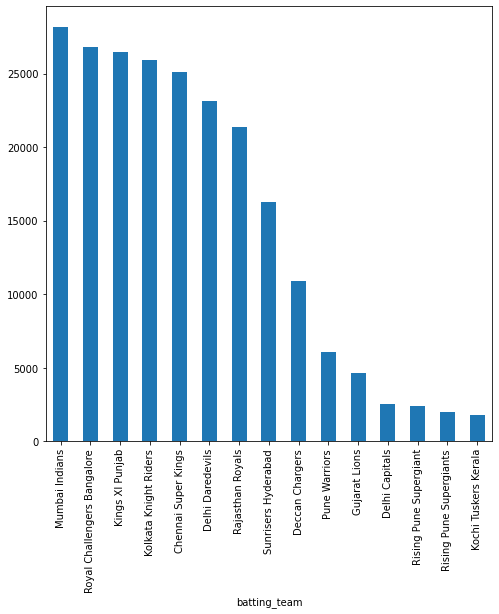

In [12]:
df.groupby('batting_team').sum()['batsman_runs'].sort_values(ascending = False).plot(kind = 'bar', figsize=(8,8))

### loading the delivery datframe 

In [14]:
match = pd.read_csv('matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [16]:
match.shape

(756, 18)

## player of the match 

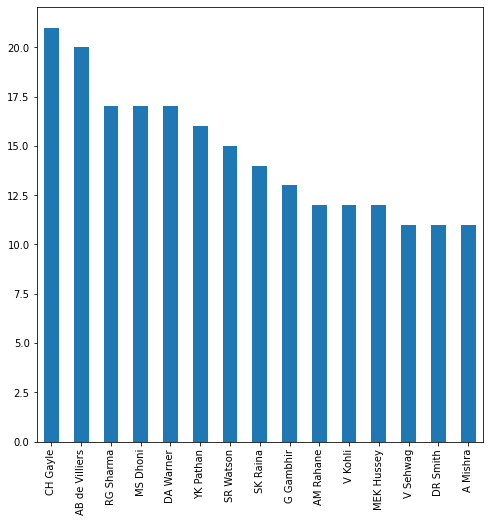

In [17]:
match['player_of_match'].value_counts().head(15).plot(kind = 'bar', figsize=(8,8))

### consistant winners is MUMBAI INDIANS 

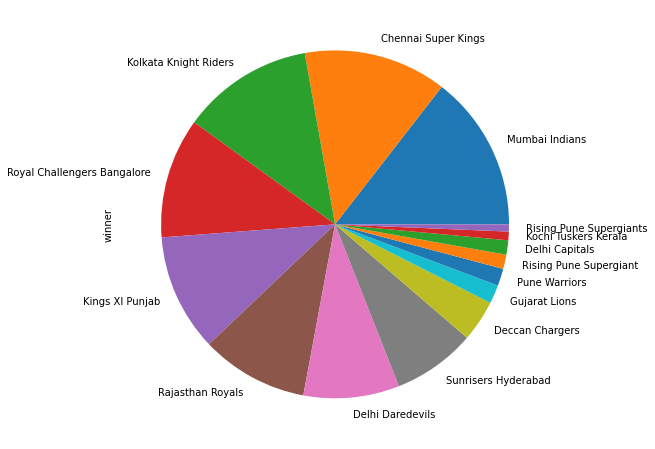

In [18]:
match['winner'].value_counts().head(15).plot(kind = 'pie', figsize=(18,8))

### team which won in the year 2015

In [19]:
matches_2015 = match[match['season']==2015]
matches_2015
winner = matches_2015.drop_duplicates(subset=['season'],keep='last')
winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN


## team winner in the year 2016

In [20]:
matches_2016 = match[match['season']==2016]
matches_2016
winner = matches_2016.drop_duplicates(subset=['season'],keep='last')
winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


## team winner in the 2017

In [21]:
matches_2017 = match[match['season']==2017]
matches_2017
winner = matches_2017.drop_duplicates(subset=['season'],keep='last')
winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN


### winners in 2018

In [24]:
matches_2018 = match[match['season']==2018]
matches_2018
winner = matches_2018.drop_duplicates(subset=['season'],keep='last')
winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
695,7953,2018,Mumbai,27/05/18,Sunrisers Hyderabad,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,8,SR Watson,Wankhede Stadium,Marais Erasmus,S Ravi,Nitin Menon


## winners in 2019

In [25]:
matches_2019 = match[match['season']==2019]
matches_2019
winner = matches_2019.drop_duplicates(subset=['season'],keep='last')
winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
755,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


# the  max no  of matches played at a stadium

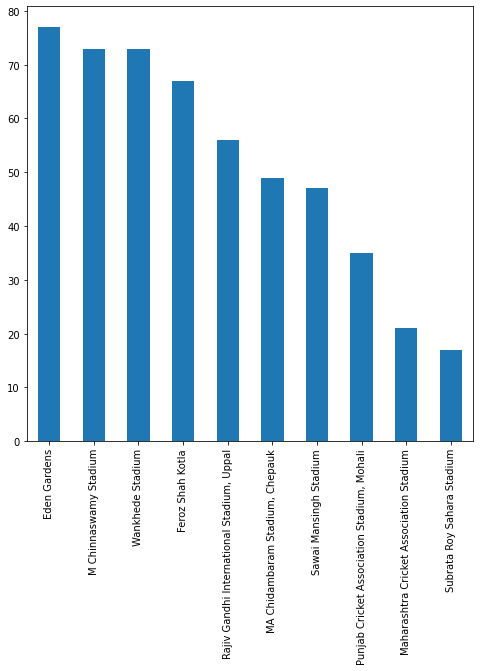

In [26]:
match['venue'].value_counts().head(10).plot(kind = 'bar', figsize=(8,8))

## merging both the data frames 

In [27]:
merged = match.merge(df,left_on ='id',right_on ='match_id',how = 'inner')
merged

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2019,Hyderabad,12/05/19,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


## stadium where max runs were scored by the batsman 

In [28]:
merged.groupby(['venue','batting_team'],as_index = False)['batsman_runs'].agg('sum').sort_values('batsman_runs',ascending = False).drop_duplicates('venue',keep = 'first')

,venue,batting_team,batsman_runs
62,Eden Gardens,Kolkata Knight Riders,11038
144,M Chinnaswamy Stadium,Royal Challengers Bangalore,10650
338,Wankhede Stadium,Mumbai Indians,10452
72,Feroz Shah Kotla,Delhi Daredevils,9464
162,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,7546
275,Sawai Mansingh Stadium,Rajasthan Royals,6957
239,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,5382
220,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,5225
211,"Punjab Cricket Association IS Bindra Stadium, ...",Kings XI Punjab,2253
314,Subrata Roy Sahara Stadium,Pune Warriors,2058


## batsman who scored  max runs in eacb season

In [29]:
merged.groupby(['season','batsman'],as_index = False)['batsman_runs'].agg('sum').sort_values('batsman_runs',ascending = False).drop_duplicates('season',keep = 'first')

,season,batsman,batsman_runs
1383,2016,V Kohli,973
1595,2018,KS Williamson,747
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1696,2019,DA Warner,727
1088,2014,RV Uthappa,660
1422,2017,DA Warner,641
446,2010,SR Tendulkar,618
115,2008,SE Marsh,616
502,2011,CH Gayle,608


#  team which has the highest run scorer 

In [30]:
merged.groupby(['batting_team','batsman'],as_index = False)['batsman_runs'].agg('sum').sort_values('batsman_runs',ascending = False)

,batting_team,batsman,batsman_runs
866,Royal Challengers Bangalore,V Kohli,5434
50,Chennai Super Kings,SK Raina,4574
36,Chennai Super Kings,MS Dhoni,3903
764,Royal Challengers Bangalore,AB de Villiers,3757
553,Mumbai Indians,RG Sharma,3744
...,...,...,...
417,Kolkata Knight Riders,J Denly,0
903,Sunrisers Hyderabad,K Ahmed,0
747,Rising Pune Supergiants,M Ashwin,0
659,Rajasthan Royals,JDP Oram,0


# maximum runs  scored by the batsman in all the years is VIRAT KHOLI hence he is a successfull batsman in comparison to the other batssman 

# the player with the best strike rate is B Stanlake with the strike rate of 250.000000 and he is from sunrises hyderabad 

# the team with the highest run scorer is virat kholi from Royal Challengers Bangalore

# batsman who scored max runs in eacb season was virat kholi so the final comparison for the best batsman can be done between virat koli and  B Stanlake and virat kholi proves to  be the best batsman in ipl for the above stated factors


# in the year 2015 mumbai indians chose to field and won the league 

# in the year 2016 Sunrisers Hyderabad chose to bat and won the league

# in the year 2017 Mumbai indians  chose to bat and won the league

#in the year 2018 Sunrisers Hyderabad chose to field and won the league

# in the year 2019 	mumbai indians  choose to bat and won the league 

# thus the team which chose to bat maximum no of times in the finals won the league 

# batting is one of the factors which contributed to the victory of mumbai indians 

# chris gayle has been awarded player of the match maximum no of times 

# so he is also a key element for the contribution for mumbai indians victory 

#companies like myntra can endorse their products through the best batsman like jersies gloves and other sport accessories 
